### Introduction

*This is a project of data wrangling and analysing of we rate dogs data,in this
project we should first gather data from different sources:
    -twitter-archive-enhanced.csv
    -image_predictions.tsv
    -Twitter API*

*After that we will go through data assessing manually and automatically,to 
detect data problems at the cleaning phase.*

*At the cleaning stage we will prepare our data to get some insights and visualisations as a final step.*



### Gathering data

In [75]:
#Import all packages needed
import pandas as pd
import numpy as np
import tweepy
from tweepy import OAuthHandler
import warnings
import time
import datetime
import json
import re
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy 
import json

In [78]:
#Import twitter archive
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [79]:
#Import image prediction
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_request = requests.get(url, allow_redirects=True)

open('image_predictions.tsv', 'wb').write(image_request.content)

335079

In [80]:
#Import image prediction
df_image = pd.read_csv('image_predictions.tsv', sep = '\t')
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [5]:
#API authentification
import tweepy

consumer_key = ' '
consumer_secret = ' '
access_token = ' '
access_secret = ' '

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [6]:
#Getting tweet 
df_intm = []
error_intm = []

start = time.time()

# Adding  tweet json to intermediate list df_intm
for tweet_id in twitter_archive['tweet_id']:
    try:
        tweet = api.get_status(tweet_id, tweet_mode='extended', wait_on_rate_limit = True,
                               wait_on_rate_limit_notify = True)._json 
        favorites = tweet['favorite_count'] 
        retweets = tweet['retweet_count'] 
        user_followers = tweet['user']['followers_count'] 
        user_favourites = tweet['user']['favourites_count'] 
        date_time = tweet['created_at'] 
        
        df_intm.append({'tweet_id': int(tweet_id), 'favorites': int(favorites), 'retweets': int(retweets),
                        'user_followers': int(user_followers), 'user_favourites': int(user_favourites),
                        'date_time': pd.to_datetime(date_time)})
        
    except Exception as e:
        print(str(tweet_id)+ " __ " + str(e))
        error_intm.append(tweet_id)
        

end = time.time()
print(end - start)

888202515573088257 __ [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 __ [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 __ [{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745 __ [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 __ [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 __ [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 __ [{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130 __ [{'code': 144, 'message': 'No status found with that ID.'}]
851953902622658560 __ [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 __ [{'code': 144, 'message': 'No status found with that ID.'}]
844704788403113984 __ [{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648 __ [{'code': 144, 'message': 'No status found with that ID.'}]
8373662848745717

In [7]:
#getting our json_tweets file
json_tweets = pd.DataFrame(df_intm, columns = ['tweet_id', 'favorites', 'retweets', 'user_followers',
                                               'user_favourites', 'date_time'])
json_tweets.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

In [8]:
#getting our tweet data 
tweet_data = pd.read_csv('tweet_json.txt', encoding = 'utf-8')
tweet_data

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,34853,7314,9012997,145190,2017-08-01 16:23:56
1,892177421306343426,30188,5465,9012997,145190,2017-08-01 00:17:27
2,891815181378084864,22729,3606,9012997,145190,2017-07-31 00:18:03
3,891689557279858688,38124,7505,9012997,145190,2017-07-30 15:58:51
4,891327558926688256,36395,8056,9012997,145190,2017-07-29 16:00:24
5,891087950875897856,18364,2703,9012997,145190,2017-07-29 00:08:17
6,890971913173991426,10689,1745,9012997,145190,2017-07-28 16:27:12
7,890729181411237888,58731,16402,9012997,145190,2017-07-28 00:22:40
8,890609185150312448,25281,3753,9012997,145190,2017-07-27 16:25:51
9,890240255349198849,28827,6336,9012997,145190,2017-07-26 15:59:51


In [9]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 6 columns):
tweet_id           2331 non-null int64
favorites          2331 non-null int64
retweets           2331 non-null int64
user_followers     2331 non-null int64
user_favourites    2331 non-null int64
date_time          2331 non-null object
dtypes: int64(5), object(1)
memory usage: 109.3+ KB


### Assessing data 

In [6]:
#Assessing visually from a sample
twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
175,857989990357356544,NaN,NaN,2017-04-28 16:08:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rosie. She was just informed of the wa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/857989990...,12,10,Rosie,None,None,None,None
1556,688828561667567616,NaN,NaN,2016-01-17 21:01:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Brad. His car probably has a spoi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/688828561...,9,10,Brad,None,None,None,None
1993,672609152938721280,NaN,NaN,2015-12-04 02:51:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Caryl. Likes to get in the microwave. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672609152...,9,10,Caryl,None,None,None,None
1491,692894228850999298,NaN,NaN,2016-01-29 02:17:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Tupawc. He's actually a Christian rapper....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/692894228...,10,10,Tupawc,None,None,None,None
2201,668645506898350081,NaN,NaN,2015-11-23 04:21:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Incredibly rare dog here. Good at bipedalism. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668645506...,11,10,None,None,None,None,None
60,880465832366813184,NaN,NaN,2017-06-29 16:39:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She had her first beach experie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/880465832...,12,10,Bella,None,None,None,None
2143,669970042633789440,NaN,NaN,2015-11-26 20:04:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Julio. He was one of the original Ring...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669970042...,10,10,Julio,None,None,None,None
1681,681981167097122816,NaN,NaN,2015-12-29 23:32:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jimothy. He's a Trinidad Poliwhirl. Fa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681981167...,12,10,Jimothy,None,None,None,None
105,872122724285648897,NaN,NaN,2017-06-06 16:07:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kody. He's a baller. Wishes he was a l...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/872122724...,12,10,Kody,None,None,None,None
163,860276583193509888,NaN,NaN,2017-05-04 23:34:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jordy. He likes to go on adventures an...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/860276583...,12,10,Jordy,None,None,None,None


 #### Some issues detected visually
 
*timestamp not in an appropriate format*

*we should see numbers of non null values in some columns ,in order to drop them if we wont use them in our analysis.

*4 columns that represent the same thing ,doggo,floofer,pupper,puppo,*
that could be seen as a Tidiness issue 



In [10]:
#information about twitter_archive 
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

## Quality
*timestamp and retweeted_status_timestamp should be datetime instead of object*

*in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id ,retweeted_status_user_id  as this columns refer to an ID, generally it should
be an integer and not a float*


In [12]:
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [13]:
#information about df_image
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


## Quality
As we can see there s some missing values on our image dataset 2075 instead of2356
    

In [14]:
#tweets with different tweet_id
df_image['jpg_url'].value_counts()

https://pbs.twimg.com/media/CVMOlMiWwAA4Yxl.jpg                                            2
https://pbs.twimg.com/media/Cx5R8wPVEAALa9r.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg    2
https://pbs.twimg.com/media/Ct72q9jWcAAhlnw.jpg                                            2
https://pbs.twimg.com/media/C2oRbOuWEAAbVSl.jpg                                            2
https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg                                            2
https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg    2
https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg                                            2
https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg                                            2
https://pbs.twimg.com/media/Cveg1-NXgAASaaT.jpg                       

## Quality
As we can see some tweets have two different tweet_id

In [15]:
#numerator values
twitter_archive[twitter_archive['rating_numerator'] < 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
229,848212111729840128,NaN,NaN,2017-04-01 16:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's doing a distinguished tong...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/848212111...,6,10,Jerry,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
387,826598799820865537,8.265984e+17,4.196984e+09,2017-02-01 01:11:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I was going to do 007/10, but the joke wasn't ...",NaN,NaN,NaN,NaN,7,10,None,None,None,None,None
462,817502432452313088,NaN,NaN,2017-01-06 22:45:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Herschel. He's slightly bi...,6.924173e+17,4.196984e+09,2016-01-27 18:42:06 +0000,https://twitter.com/dog_rates/status/692417313...,7,10,Herschel,None,None,pupper,None
485,814578408554463233,NaN,NaN,2016-12-29 21:06:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur ...,6.981954e+17,4.196984e+09,2016-02-12 17:22:12 +0000,https://twitter.com/dog_rates/status/698195409...,9,10,Beau,None,None,None,None
599,798682547630837760,NaN,NaN,2016-11-16 00:22:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Here we see a rare pouched pupp...,6.769365e+17,4.196984e+09,2015-12-16 01:27:03 +0000,https://twitter.com/dog_rates/status/676936541...,8,10,None,None,None,pupper,None
605,798576900688019456,NaN,NaN,2016-11-15 17:22:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Not familiar with this breed. N...,6.661041e+17,4.196984e+09,2015-11-16 04:02:55 +0000,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None
730,781661882474196992,NaN,NaN,2016-09-30 01:08:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Who keeps sending in pictures without dogs in ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/781661882...,5,10,None,None,None,None,None
745,780092040432480260,NaN,NaN,2016-09-25 17:10:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Hank. He's mischievous ...,7.533757e+17,4.196984e+09,2016-07-13 23:48:51 +0000,https://twitter.com/dog_rates/status/753375668...,8,10,Hank,None,None,None,None


In [16]:
#rating_numerator info
twitter_archive.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [17]:
#rating_denominator info
twitter_archive.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

## Quality
As we can see rating_numerator and denominator have some invalid structure,
so we need to standarize the rating.

In [18]:
# Detecting retweets
twitter_archive[twitter_archive['retweeted_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


As we can see there are some retweets and we only need original tweets

### Assessing issues

## Quality

1-*timestamp and retweeted_status_timestamp should be datetime instead of object*

2-*in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id ,retweeted_status_user_id  as this columns refer to an ID, generally it should
be an integer and not a float*

3-*Dropping some unnecessary columns for our analysis*

4-*missing values on our image dataset*

5-*some tweets have two different tweet_id*

6-*rating_numerator and denominator have some invalid structure*

7-*there are some retweets and we only need original tweets*

8-*sources are not readable*


### Tidiness
*Same stage in 4 columns (doggo, floofer, pupper, puppo)*

*Merging the 3 different sources of data in one tidy dataset*

## Cleaning

*At this level we will fix the issues mentioned before*

In [19]:
#First of all creating copy of of our dataframes
twitter_archive_c=twitter_archive.copy()
df_image_c=df_image.copy()
tweet_data_c=tweet_data.copy()

###  define

*Merging tweet_data,image with the twitter_archive*

In [20]:
#code
# merging data
twitter_archive_c = pd.merge(left=twitter_archive_c,
                                 right=tweet_data_c, left_on='tweet_id', right_on='tweet_id', how='inner')

In [22]:
#code
# merging data
twitter_archive_c=twitter_archive_c.merge(df_image_c,on='tweet_id', how='inner')

In [23]:
twitter_archive_c.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num_y,p1_y,p1_conf_y,p1_dog_y,p2_y,p2_conf_y,p2_dog_y,p3_y,p3_conf_y,p3_dog_y
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [24]:
#Test
#information about merged data
twitter_archive_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 44 columns):
tweet_id                      2059 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2059 non-null object
source                        2059 non-null object
text                          2059 non-null object
retweeted_status_id           72 non-null float64
retweeted_status_user_id      72 non-null float64
retweeted_status_timestamp    72 non-null object
expanded_urls                 2059 non-null object
rating_numerator              2059 non-null int64
rating_denominator            2059 non-null int64
name                          2059 non-null object
doggo                         2059 non-null object
floofer                       2059 non-null object
pupper                        2059 non-null object
puppo                         2059 non-null object
favorites                     2059 

*By merging the data we are only keeping tweets with available images*

### define
*Changig data types of:*

*timestamp and retweeted_status_timestamp should be datetime instead of object*

*As i have only 23 non null values in in_reply_to_status_id,in_reply_to_user_id
and i will not use it in my analysis ,i will not go trough changing data type,
and the same thing for retweeted_status_id ,retweeted_status_user_id* .

So the best thing to do at this situaton is to trop them.


In [25]:
#Code
twitter_archive_c['timestamp'] = pd.to_datetime(twitter_archive_c.timestamp)
twitter_archive_c['retweeted_status_timestamp'] = pd.to_datetime(twitter_archive_c.retweeted_status_timestamp)


In [26]:
#Test
twitter_archive_c.dtypes

tweet_id                               int64
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp    datetime64[ns]
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
favorites                              int64
retweets                               int64
user_followers                         int64
user_favourites                        int64
date_time                             object
jpg_url   

*As we can see,now we have datetime type for our variables*

### define
*Deleting retweets*

In [26]:
#Code
twitter_archive_c = twitter_archive_c[pd.isnull(twitter_archive_c['retweeted_status_user_id'])]

In [27]:
#Test
print(sum(twitter_archive_c.retweeted_status_user_id.value_counts()))

0


*Our dataframe is now clear from any retweets*

### define
*Deleting duplicated tweets*

In [28]:
#Code
twitter_archive_c = twitter_archive_c.drop_duplicates()

In [29]:
#Test
twitter_archive_c.duplicated().sum()

0

*As we can see theres no duplicated tweet in our dataframe*

### define
*Dropping unnecessary columns*

In [30]:
#code
twitter_archive_c = twitter_archive_c.drop(['in_reply_to_user_id',
                                                    'in_reply_to_status_id',
                                                    'retweeted_status_id',
                                                    'retweeted_status_user_id'], 1)

In [31]:
#Test
list(twitter_archive_c)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'favorites',
 'retweets',
 'user_followers',
 'user_favourites',
 'date_time',
 'jpg_url_x',
 'img_num_x',
 'p1_x',
 'p1_conf_x',
 'p1_dog_x',
 'p2_x',
 'p2_conf_x',
 'p2_dog_x',
 'p3_x',
 'p3_conf_x',
 'p3_dog_x',
 'jpg_url_y',
 'img_num_y',
 'p1_y',
 'p1_conf_y',
 'p1_dog_y',
 'p2_y',
 'p2_conf_y',
 'p2_dog_y',
 'p3_y',
 'p3_conf_y',
 'p3_dog_y']

*We have successfully droped the unnecessary columns*

### define
*Getting dog stages in one column as a tidy data*

In [32]:
#code
twitter_archive_c.loc[twitter_archive_c.doggo == 'None', 'doggo'] = ''
twitter_archive_c.loc[twitter_archive_c.floofer == 'None', 'floofer'] = ''
twitter_archive_c.loc[twitter_archive_c.pupper == 'None', 'pupper'] = ''
twitter_archive_c.loc[twitter_archive_c.puppo == 'None', 'puppo'] = ''

twitter_archive_c['dog_stage'] =twitter_archive_c.doggo+twitter_archive_c.floofer + twitter_archive_c.pupper + twitter_archive_c.puppo
twitter_archive_c.loc[twitter_archive_c.dog_stage == 'doggopupper', 'dog_stage'] = 'doggopupper'
twitter_archive_c.loc[twitter_archive_c.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggopuppo'
twitter_archive_c.loc[twitter_archive_c.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggofloofer'

twitter_archive_c.loc[twitter_archive_c.dog_stage == '', 'dog_stage'] = 'None'


In [33]:
#Test
twitter_archive_c.dog_stage.value_counts()

None            1682
pupper           203
doggo             62
puppo             22
doggopupper        9
floofer            7
doggofloofer       1
doggopuppo         1
Name: dog_stage, dtype: int64

*From now we have only one column that describes dogs stage instead of four columns
wich is an example of a necessary process to go throught to get a tidy data*

### define
*Making source column clear and readable*

In [34]:
#Code
twitter_archive_c['source'] = twitter_archive_c['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

In [35]:
#Test
twitter_archive_c.sample(20)

,tweet_id,timestamp,source,text,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
1818,670442337873600512,2015-11-28 03:21:24,Twitter for iPhone,Meet Koda. He's large. Looks very soft. Great ...,NaT,https://twitter.com/dog_rates/status/670442337...,11,10,Koda,,...,Sussex_spaniel,0.403552,True,otterhound,0.256302,True,Irish_terrier,0.187315,True,None
237,835574547218894849,2017-02-25 19:37:50,Twitter for iPhone,This is Eli. He works backstage at Bone Jovi c...,NaT,https://twitter.com/dog_rates/status/835574547...,11,10,Eli,,...,Staffordshire_bullterrier,0.610655,True,muzzle,0.132138,False,American_Staffordshire_terrier,0.109544,True,None
897,734912297295085568,2016-05-24 01:02:00,Twitter for iPhone,This is Jax. He's a literal fluffball. Sneaky ...,NaT,https://twitter.com/dog_rates/status/734912297...,10,10,Jax,,...,Maltese_dog,0.847292,True,feather_boa,0.059379,False,Old_English_sheepdog,0.052758,True,None
118,863907417377173506,2017-05-15 00:02:33,Twitter for iPhone,This is Albus. He's quite impressive at hide a...,NaT,https://twitter.com/dog_rates/status/863907417...,13,10,Albus,,...,marmot,0.358828,False,meerkat,0.174703,False,weasel,0.123485,False,None
800,748699167502000129,2016-07-01 02:06:06,Twitter for iPhone,Meet Tripp. He's being eaten by a sherk and do...,NaT,https://twitter.com/dog_rates/status/748699167...,11,10,Tripp,,...,Pembroke,0.849029,True,Cardigan,0.083629,True,kelpie,0.024394,True,None
1584,675147105808306176,2015-12-11 02:56:28,Twitter for iPhone,When you're presenting a group project and the...,NaT,https://twitter.com/dog_rates/status/675147105...,10,10,None,,...,golden_retriever,0.949215,True,Labrador_retriever,0.016765,True,flat-coated_retriever,0.010637,True,None
1382,683481228088049664,2016-01-03 02:53:17,Twitter for iPhone,Meet Banjo. He's a Peppercorn Shoop Da Whoop. ...,NaT,https://twitter.com/dog_rates/status/683481228...,11,10,Banjo,,...,keeshond,0.508951,True,chow,0.442016,True,German_shepherd,0.013206,True,pupper
1414,681610798867845120,2015-12-28 23:00:52,Twitter for iPhone,*collapses* 12/10 https://t.co/C7M8mnzHIK,NaT,https://twitter.com/dog_rates/status/681610798...,12,10,None,,...,toy_poodle,0.821704,True,miniature_poodle,0.116042,True,Yorkshire_terrier,0.014847,True,None
849,742465774154047488,2016-06-13 21:16:49,Twitter for iPhone,Was just informed about this hero pupper and o...,NaT,https://twitter.com/dog_rates/status/742465774...,14,10,None,,...,web_site,0.997154,False,comic_book,0.000439,False,desktop_computer,0.000268,False,pupper
601,778286810187399168,2016-09-20 17:36:50,Twitter for iPhone,This is Stanley. He has too much skin. Isn't h...,NaT,https://twitter.com/dog_rates/status/778286810...,11,10,Stanley,,...,Boston_bull,0.322070,True,pug,0.229903,True,muzzle,0.101420,False,None


### define
*Fixing numerator and denominator columns*

In [41]:
#Code 
# fixing text,and rating_denominator to rating 10 to respect standard rating
correct_rating = twitter_archive_c[twitter_archive_c.text.str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")].text

for i in correct_rating:
    x = twitter_archive_c.text == i
    twitter_archive_c.loc[x,'rating_numerator'] = re.findall(r"\d+\.?\d*\/\d+\.?\d*\D+(\d+\.?\d*)\/\d+\.?\d*", i)
    twitter_archive_c.loc[x,'rating_denominator'] = 10

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


In [43]:
#Test1

twitter_archive_c[twitter_archive_c.text.isin(correct_rating)]

,tweet_id,timestamp,source,text,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
605,777684233540206592,2016-09-19 01:42:24,Twitter for iPhone,"""Yep... just as I suspected. You're not flossi...",NaT,https://twitter.com/dog_rates/status/777684233...,11,10.0,None,,...,cocker_spaniel,0.253442,True,golden_retriever,0.162850,True,otterhound,0.110921,True,None
812,747600769478692864,2016-06-28 01:21:27,Twitter for iPhone,This is Bookstore and Seaweed. Bookstore is ti...,NaT,https://twitter.com/dog_rates/status/747600769...,7,10.0,Bookstore,,...,Chesapeake_Bay_retriever,0.804363,True,Weimaraner,0.054431,True,Labrador_retriever,0.043268,True,None
863,740373189193256964,2016-06-08 02:41:38,Twitter for iPhone,"After so many requests, this is Bretagne. She ...",NaT,https://twitter.com/dog_rates/status/740373189...,14,10.0,None,,...,golden_retriever,0.807644,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True,None
954,722974582966214656,2016-04-21 02:25:47,Twitter for iPhone,Happy 4/20 from the squad! 13/10 for all https...,NaT,https://twitter.com/dog_rates/status/722974582...,13,10.0,None,,...,Great_Dane,0.246762,True,Greater_Swiss_Mountain_dog,0.126131,True,Weimaraner,0.085297,True,None
988,716439118184652801,2016-04-03 01:36:11,Twitter for iPhone,This is Bluebert. He just saw that both #Final...,NaT,https://twitter.com/dog_rates/status/716439118...,11,10.0,Bluebert,,...,Siberian_husky,0.396495,True,malamute,0.317053,True,Eskimo_dog,0.273419,True,None
1004,714258258790387713,2016-03-28 01:10:13,Twitter for iPhone,Meet Travis and Flurp. Travis is pretty chill ...,NaT,https://twitter.com/dog_rates/status/714258258...,8,10.0,Travis,,...,collie,0.176758,True,Chesapeake_Bay_retriever,0.101834,True,beagle,0.101294,True,None
1126,703356393781329922,2016-02-26 23:10:06,Twitter for iPhone,This is Socks. That water pup w the super legs...,NaT,https://twitter.com/dog_rates/status/703356393...,2,10.0,Socks,,...,Border_collie,0.894842,True,collie,0.097364,True,English_springer,0.003037,True,None
1216,695064344191721472,2016-02-04 02:00:27,Twitter for iPhone,This may be the greatest video I've ever been ...,NaT,https://twitter.com/dog_rates/status/695064344...,13,10.0,None,,...,seat_belt,0.522211,False,sunglasses,0.077552,False,ice_lolly,0.051774,False,None
1221,694352839993344000,2016-02-02 02:53:12,Twitter for iPhone,Meet Oliviér. He takes killer selfies. Has a d...,NaT,https://twitter.com/dog_rates/status/694352839...,5,10.0,Oliviér,,...,Australian_terrier,0.407886,True,Yorkshire_terrier,0.328173,True,silky_terrier,0.108404,True,None
1256,691483041324204033,2016-01-25 04:49:38,Twitter for iPhone,When bae says they can't go out but you see th...,NaT,https://twitter.com/dog_rates/status/691483041...,10,10.0,None,,...,bloodhound,0.886232,True,black-and-tan_coonhound,0.077420,True,Gordon_setter,0.009826,True,None


In [35]:
#Test2
twitter_archive_c.rating_denominator.describe()

count    1987.000000
mean       10.533971
std         7.333532
min         2.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

*As 75% of denominators value respect the denominator format(=10),
i will not go further at denominator transformations.*

In [36]:
#Test3
twitter_archive_c.rating_numerator.describe()

count    1987.000000
mean       12.280825
std        41.570741
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

*As 75% of numerators  value respect the numerator format(>10),
i will not go further at numerator transformations.*

In [37]:
#Creating rating column for further analysis (insight and visualisation)
twitter_archive_c['rating'] = twitter_archive_c['rating_numerator'] / twitter_archive_c['rating_denominator'].astype(float)

In [38]:
twitter_archive_c.rating.describe()

count    1987.000000
mean        1.169040
std         4.074226
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max       177.600000
Name: rating, dtype: float64

In [39]:
# Storing clean Data
twitter_archive_c.to_csv('twitter_archive_master.csv', index=False)

## Analyzing,and Visualizing Data

In [40]:
df_v=pd.read_csv('twitter_archive_master.csv')
df_v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 42 columns):
tweet_id                      1987 non-null int64
timestamp                     1987 non-null object
source                        1987 non-null object
text                          1987 non-null object
retweeted_status_timestamp    0 non-null float64
expanded_urls                 1987 non-null object
rating_numerator              1987 non-null int64
rating_denominator            1987 non-null int64
name                          1987 non-null object
doggo                         73 non-null object
floofer                       8 non-null object
pupper                        212 non-null object
puppo                         23 non-null object
favorites                     1987 non-null int64
retweets                      1987 non-null int64
user_followers                1987 non-null int64
user_favourites               1987 non-null int64
date_time                     1987 non-null

Text(0.5,1,'Relation between favorites and retweets')

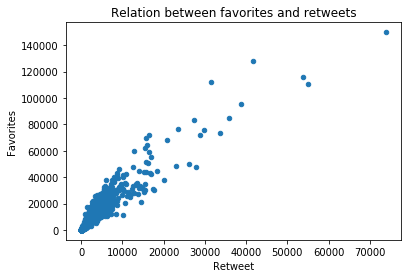

In [41]:
# First insight
# Relation between retweets and favorites
df_v.plot(x='retweets', y='favorites', kind='scatter')
plt.xlabel('Retweet')
plt.ylabel('Favorites')
plt.title('Relation between favorites and retweets')

*There s a positive relation between retweets and favorites,
the more the image is retweeted, the more becomes a favorite*

In [42]:
# Favorites information
df_v.favorites.describe()

count      1987.000000
mean       7965.190237
std       11734.891177
min          69.000000
25%        1706.000000
50%        3603.000000
75%        9891.500000
max      149741.000000
Name: favorites, dtype: float64

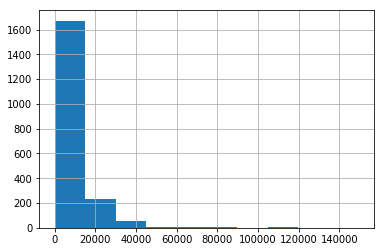

In [43]:
#favorites distributions
df_v.favorites.hist()

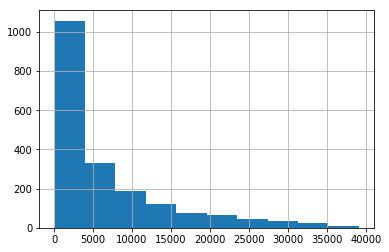

In [44]:
#favorites distribution details
df_v[df_v.favorites<= 40000].favorites.hist()

*The most favorites are concentrated around 5000 tweets*

In [55]:
#Count of numerator values
df_v.groupby(['rating_numerator']).count()['tweet_id']

rating_numerator
0         2
1         5
2         9
3        19
4        16
5        33
6        32
7        52
8        95
9       151
10      418
11      396
12      448
13      257
14       35
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        1
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
204       1
420       1
1776      1
Name: tweet_id, dtype: int64

*As seen most values are between o and 14*

In [68]:
#Creatin a subest of numerators count  under 14
df_14 = df_v[(df_v.rating_numerator <= 14)]
subset_v = df_14.groupby(['rating_numerator']).count()['tweet_id']

Text(0.5,1,'Distribution of Rating Numerators')

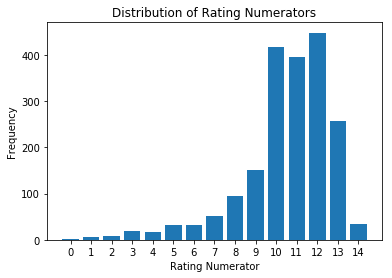

In [69]:
#Districution of rating numerators
plt.bar(np.arange(15), subset_v )
plt.xticks(np.arange(15))
plt.xlabel('Rating Numerator')
plt.ylabel('Frequency')
plt.title('Distribution of Rating Numerators')

*Most numerators have the value of 12 wich was totally expected as the mean
is 12.280825 by the describe method*

In [73]:

df_v.timestamp = pd.to_datetime(df_v['timestamp'], format='%Y-%m-%d %H:%M:%S.%f')
monthly_tweets = df_v.groupby(pd.Grouper(key = 'timestamp', freq = "M")).count().reset_index()
monthly_tweets = monthly_tweets[['timestamp', 'tweet_id']]
monthly_tweets.head()
monthly_tweets.sum()

tweet_id    1987
dtype: int64

Text(0.5,1,'Evolution of tweets by the time')

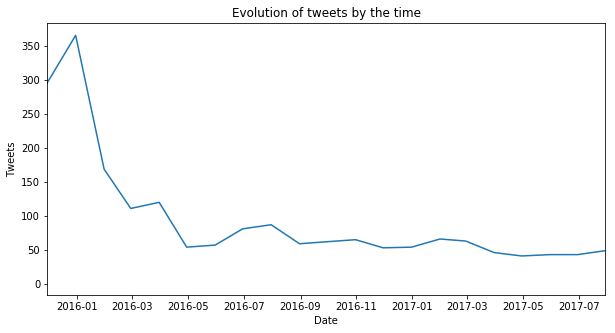

In [82]:
plt.figure(figsize=(10, 5))
plt.xlim([datetime.date(2015, 11, 30), datetime.date(2017, 7, 30)])
plt.xlabel('Date')
plt.ylabel('Tweets')
plt.plot(monthly_tweets.timestamp, monthly_tweets.tweet_id)
plt.title('Evolution of tweets by the time')

*As we can see the number of tweets is decreasing by the time*

### Conclusion
*At this project we went trought different stages of data wrangling and analysis
from:
    -Data gathering
    -Data assessing
    -Data cleaning
    -Data visualisation
*After all this steps we could get some ideas about the relation between retweets
and favorites,and favorites distribution.*

*We have got also an idea on the rating numerators distribution before going
trought the analysis of the evolution of tweets over time.*